# Using machine learning to predict writer earnings based on the new medium's partner program model
We build a simple model using the earnings_data.csv data set for predicting writer's saily earnings based on member reading time. This project is organized as follows: (1) importation of necessary libraries; (2) importation of dataset; (3) building of regression model; and (d) model training, testing, and evaluation.

Author: Benjamin O. Tayo
Date: 12/1/2019

# 1. Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## 2. Read dataset and display colums

In [2]:
df=pd.read_csv("earnings_data.csv")
df.head(n=10)

,time,earning
0,53,3.17
1,90,6.05
2,155,7.75
3,147,8.05
4,51,2.63
5,30,2.23
6,206,7.87
7,128,4.88
8,128,5.21
9,161,5.85


## 3. Build basic regression model

In [3]:
X = df['time'].values
y = df['earning'].values
slope = np.polyfit(X,y,1)[0]
intercept = np.polyfit(X,y,1)[1]
y_pred = intercept + slope*X

In [4]:
print('Slope or Earning Rate: %.3f' % slope )

Slope or Earning Rate: 0.038


In [5]:
print('Intercept: %.3f' % intercept )

Intercept: 0.827


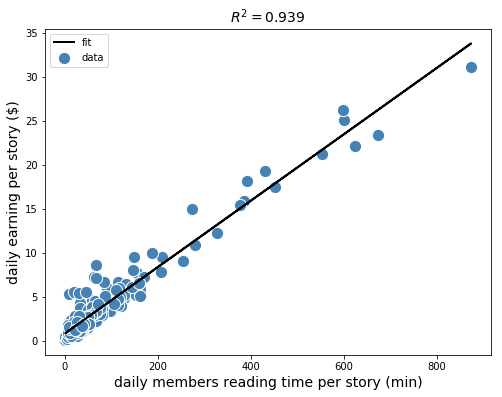

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(X,y,label='data', c='steelblue', edgecolor='white', s=150)
plt.plot(X, y_pred,color='black', lw=2,label='fit')
plt.title('$ R^2 = 0.939 $',size=14)
plt.xlabel('daily members reading time per story (min)',size=14)
plt.ylabel('daily earning per story ($)',size=14)
plt.legend()
plt.show()

## 4. Model Training, Testing, and Evaluation

In [7]:
slope = []
intercept =  []
train_score = []
test_score = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=i)
    a = np.polyfit(X_train,y_train,1)[0]
    b = np.polyfit(X_train,y_train,1)[1]
    y_train_pred = a*X_train + b
    y_test_pred = a*X_test + b
    train_score = np.append(train_score, r2_score(y_train,y_train_pred))
    test_score = np.append(test_score, r2_score(y_test,y_test_pred))
    slope = np.append(rate, np.polyfit(X_train, y_train,1)[0])
    intercept = np.append(intercept, np.polyfit(X_train, y_train,1)[1])

NameError: name 'rate' is not defined

In [ ]:
slope

In [ ]:
intercept

In [ ]:
print('Earning Rate: %.3f +/- %.3f' % (np.mean(slope),np.std(slope)))

In [ ]:
print('Intercept: %.3f +/- %.3f' % (np.mean(intercept),np.std(intercept)))

In [ ]:
train_score

In [ ]:
test_score

In [ ]:
print('R2 Train Score : %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))

In [ ]:
print('R2 Test Score : %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))